In [1]:
import os
import numpy as np
import cv2
from IPython.display import Image
from deskew_to_gray import preprocess_raw_image
from kmeans_to_binary import gray_to_binary
from segment_binary_image import text_to_characters
from filtering_and_scaling import image_to_numpy_array
from cnn_th import classify_digits
from verify_result import download_reCaptcha, evaluate
from plot_util import plot_images

Using Theano backend.


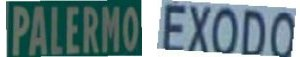

In [14]:
uid = np.random.randint(0, 15688)
# get a new ReCAPTCHA
path, context = download_reCaptcha(uid)
# show the CAPTCHA
Image(filename=path)

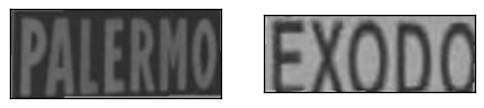

In [15]:
output_directory = os.getcwd() + "/output/"
# split the image to two halfs, deskew each one, 
# remove whitespaces and convert them to gray images
# the temporary results of each step are stored in output folder for reference
processed_grays = preprocess_raw_image(path, output_directory)
# show processed images
plot_images(processed_grays)

img8961_fill_white_0 [ 72.63868126] [ 176.51153846] [ 150.54332416] 0.966460268318 0.0335397316821
img8961_fill_white_1 [ 76.6476785] [ 155.58415597] [ 135.8500366] 0.387452758881 0.612547241119
2


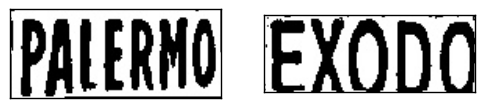

In [16]:
binary_images = []
kmeans_images = []
for gray in processed_grays:
    # kmeans with cluster = 2 to split the background and foreground
    # based on kmeans result to set hyper-parameters and
    # use adaptive thresholding to convert the gray image to binary image
    binary, kmeans = gray_to_binary(gray)
    binary_images.append(binary)
    kmeans_images.append(kmeans)
print len(binary_images)
# show binary images
plot_images(binary_images)

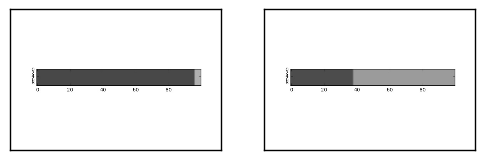

In [17]:
# show the result of kmeans clustering
plot_images(kmeans_images)

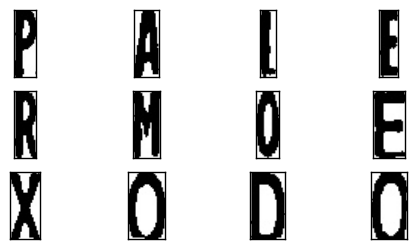

In [18]:
characters = []
for binary in binary_images:
    # segment the binary images, and output single characters
    characters.extend(text_to_characters(binary, output_directory))
# show segmented characters
plot_images(characters)

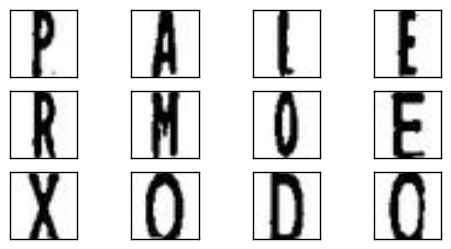

In [19]:
# filter and scale the image to 28 * 28
filtered_chars, to_classify = image_to_numpy_array(characters)
# show the filtered and scaled images
plot_images(filtered_chars)

In [8]:
# load pretrained model to classify
pretrained_model = "pretrained_model.w"
if len(filtered_chars) == 0:
    print "Failed to segment"
else:
    results = classify_digits(pretrained_model, to_classify)
    print "The final result is", results

The final result is RLOTE


In [9]:
print "Passed verification successfully" if evaluate("LANE", context) else "Failed to pass verification"

Failed to pass verification
